# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [20]:
df_chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [4]:
df_chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

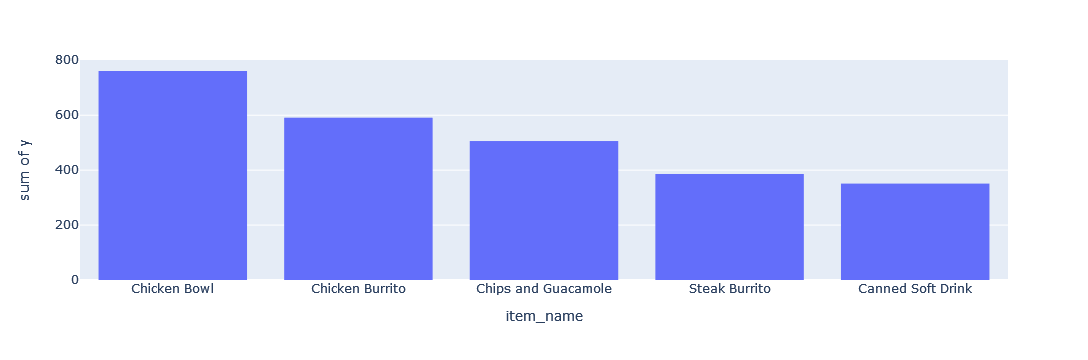

In [15]:
top = df_chipo.groupby('item_name').sum('quantity').sort_values('quantity', ascending=False).quantity.head(5)
px.histogram(data_frame=top, x=top.index, y=top)

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [21]:
df_chipo.item_price = df_chipo.item_price.str.replace('$','', regex=True).astype('float')

,order_id,quantity,item_price
item_name,,,
6 Pack Soft Drink,52322,55,356.95
Barbacoa Bowl,53972,66,672.36
Barbacoa Burrito,74718,91,894.75
Barbacoa Crispy Tacos,5613,12,120.21
Barbacoa Salad Bowl,9708,10,106.40
Barbacoa Soft Tacos,18725,25,250.46
Bottled Water,175944,211,302.56
Bowl,472,4,29.60
Burrito,1550,6,44.40


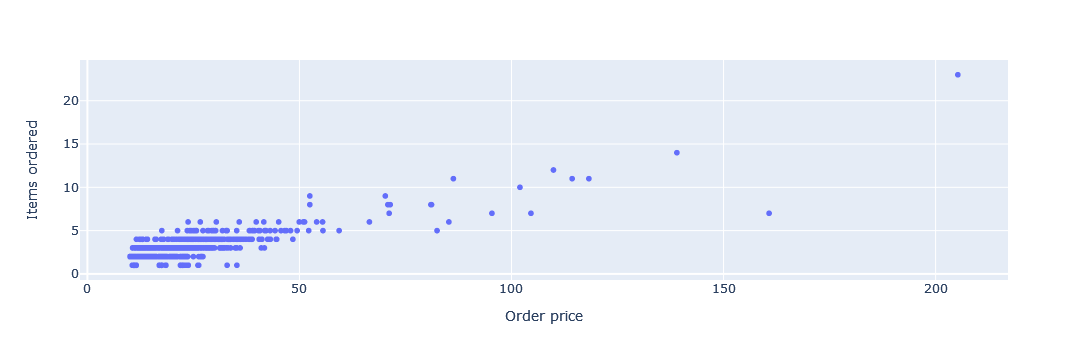

In [28]:
data = df_chipo.groupby('order_id').agg({'item_price':'sum','item_name':'count'})
px.scatter(data_frame=data, x=data.item_price, y=data.item_name,
           labels={
               'item_name':'Items ordered',
               'item_price':'Order price'
           })

### Step 7. BONUS: Create a question and a graph to answer your own question.